# images

using https://platform.openai.com/docs/guides/images/usage?context=python

In [1]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

In [2]:
import json
from abcli import fullname, string
from abcli.modules import objects
from openai_cli.images.api import OpenAIImageGenerator
from abcli import file
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2638.1-unknown, built on 20 January 2024, 19:25:08


In [3]:
object_name = f"openai-images-{string.timestamp()}"
object_path = objects.object_path(object_name, create=True)

In [4]:
prompt = "a person flying through the streets of Vancouver."
filename = objects.path_of(f"{string.timestamp()}.png",object_name)

In [5]:
generator = OpenAIImageGenerator(verbose=True)

OpenAIImageGenerator[dall-e-3]


OpenAIImageGenerator.generate: a person flying through the streets of Vancouver.
OpenAIImageGenerator.augment_prompt: THIS IS A RAW EXECUTION. ABSOLUTELY DO NOT REVISE THIS PROMPT: a person flying through the streets of Vancouver.
HTTP Request: POST https://api.openai.com/v1/images/generations "HTTP/1.1 200 OK"
{
    "created": 1705807516,
    "data": [
        {
            "b64_json": null,
            "revised_prompt": "A person flying through the streets of Vancouver. The person shows no clear sign of any device aiding their flight. The urban landscape below them sprawls out, with numerous buildings of varying architectural styles. Stick-straight streets lined with trees stretch out in regular intervals. People on the ground watch in amazement as the person flies overhead. In the distance, the landscape mellows into green hills and mountains. Above, the sky is a vast expanse of blue, dotted with fluffy white clouds.",
            "url": "https://oaidalleapiprodscus.blob.core.window

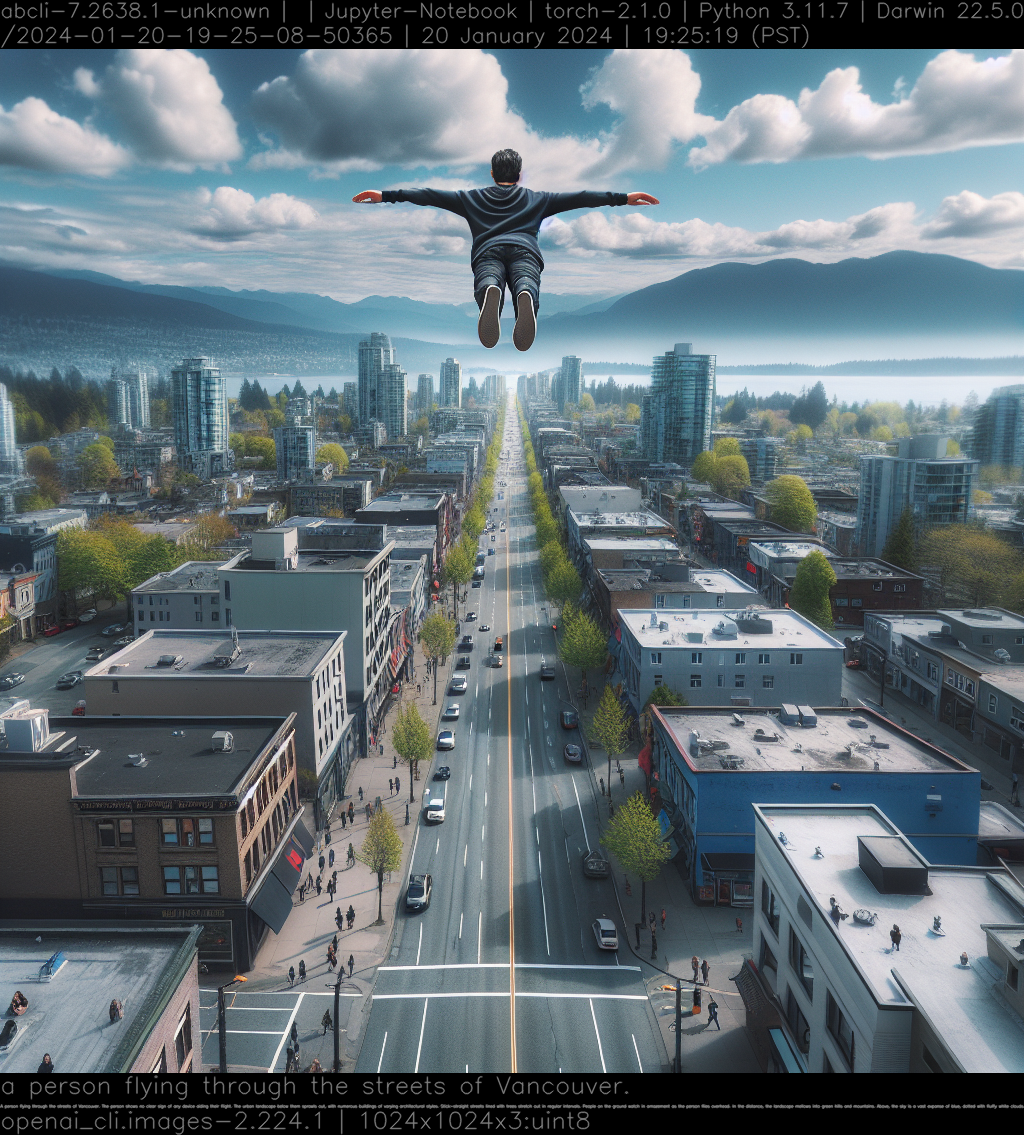

In [6]:
success, response = generator.generate(
    prompt=prompt,
    filename=filename)

assert success

---

In [7]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli_upload - $object_name

🔋 gpu: not found.
🚀 abcli-7.2638.1.2023-06-aws-batch-a
confirmed: openai-images-2024-01-20-19-25-08-83686 does not exist.
openai-images-2024-01-20-19-25-08-83686 open upload started.
upload: ../../../storage/abcli/openai-images-2024-01-20-19-25-08-83686/2024-01-20-19-25-08-50365.png to s3://kamangir/bolt/openai-images-2024-01-20-19-25-08-83686/2024-01-20-19-25-08-50365.png


openai-images-2024-01-20-19-25-08-83686 += #open.


In [8]:
# END